**Arboles de Decision**

**Jhordin Andres Olave Zuñiga**

**UNAD - TRABAJO 3 ANALISIS DE DATOS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([  2.,  27., 134., 361., 555., 352., 132.,  29.,   3.,   4.]),
 array([2.74 , 2.867, 2.994, 3.121, 3.248, 3.375, 3.502, 3.629, 3.756,
        3.883, 4.01 ]),
 <BarContainer object of 10 artists>)

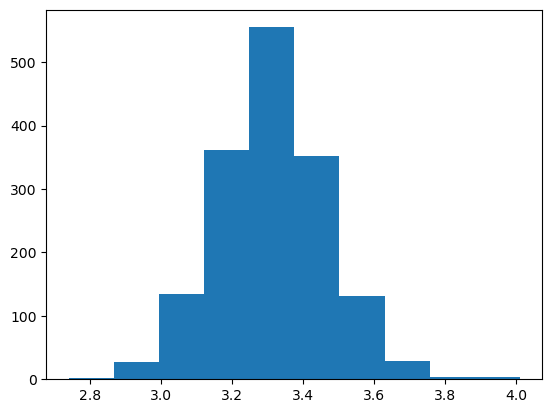

In [6]:
plt.hist(data.pH)

(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <BarContainer object of 10 artists>)

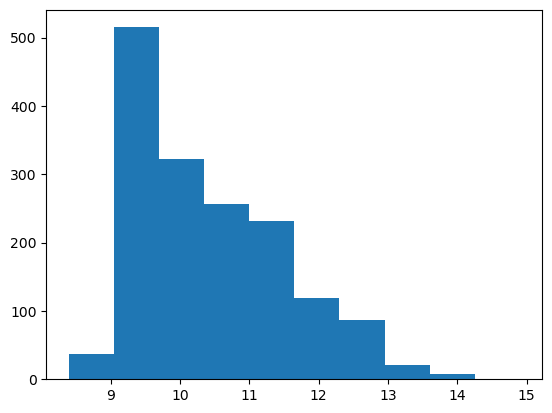

In [7]:
plt.hist(data.alcohol)

<Axes: xlabel='alcohol', ylabel='density'>

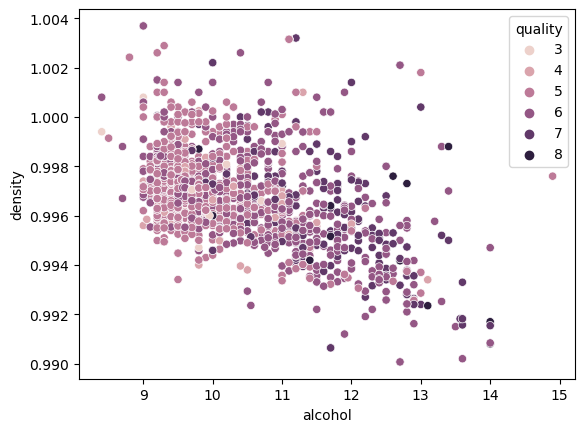

In [8]:
sns.scatterplot(x = "alcohol", y = "density", hue = "quality", data = data)

In [9]:
predictors_col = ["density", "pH", "sulphates", "alcohol"]
target_col = ['quality']

In [10]:
predictors = data[predictors_col]
target = data[target_col]

In [11]:
predictors

,density,pH,sulphates,alcohol
0,0.99780,3.51,0.56,9.4
1,0.99680,3.20,0.68,9.8
2,0.99700,3.26,0.65,9.8
3,0.99800,3.16,0.58,9.8
4,0.99780,3.51,0.56,9.4
...,...,...,...,...
1594,0.99490,3.45,0.58,10.5
1595,0.99512,3.52,0.76,11.2
1596,0.99574,3.42,0.75,11.0
1597,0.99547,3.57,0.71,10.2


In [12]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [13]:
corr = predictors.corr()
corr

,density,pH,sulphates,alcohol
density,1.000000,-0.341699,0.148506,-0.496180
pH,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.148506,-0.196648,1.000000,0.093595
alcohol,-0.496180,0.205633,0.093595,1.000000


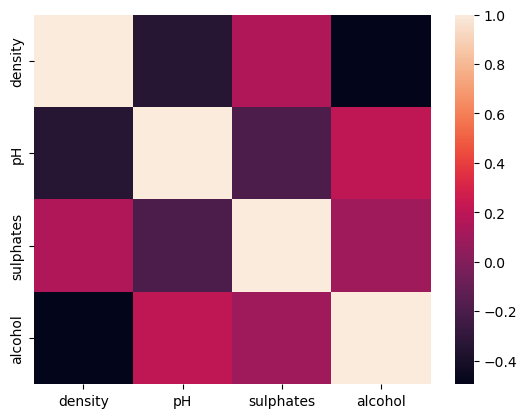

In [14]:
sns.heatmap(corr)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.15, random_state=13)

In [16]:
tree = DecisionTreeClassifier()

In [17]:
arbol = tree.fit(X_train, y_train)

[Text(0.5275008914204213, 0.9814814814814815, 'x[3] <= 10.525\ngini = 0.644\nsamples = 1359\nvalue = [9, 46, 572, 546, 173, 13]'),
 Text(0.20382785071679344, 0.9444444444444444, 'x[2] <= 0.535\ngini = 0.545\nsamples = 826\nvalue = [6, 30, 481, 278, 31, 0]'),
 Text(0.04125219426565243, 0.9074074074074074, 'x[3] <= 9.533\ngini = 0.372\nsamples = 193\nvalue = [2, 14, 150, 26, 1, 0]'),
 Text(0.015213575190169689, 0.8703703703703703, 'x[3] <= 9.075\ngini = 0.226\nsamples = 96\nvalue = [0, 5, 84, 7, 0, 0]'),
 Text(0.009362200117027502, 0.8333333333333334, 'x[2] <= 0.48\ngini = 0.611\nsamples = 6\nvalue = [0, 2, 3, 1, 0, 0]'),
 Text(0.004681100058513751, 0.7962962962962963, 'x[3] <= 9.025\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0, 0]'),
 Text(0.0023405500292568754, 0.7592592592592593, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.007021650087770626, 0.7592592592592593, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.014043300175541252, 0.79629629629629

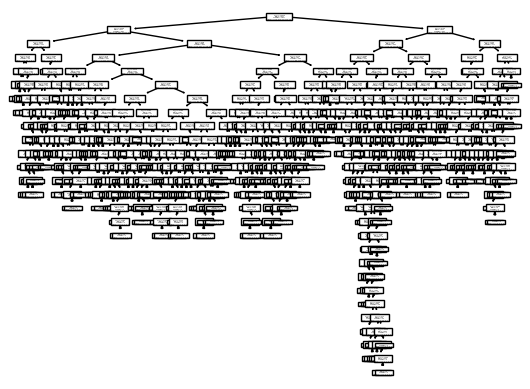

In [18]:
plot_tree(arbol)

In [19]:
predicciones = arbol.predict(X_test)

In [20]:
predicciones

array([7, 6, 5, 5, 6, 5, 6, 7, 5, 5, 5, 6, 5, 5, 7, 6, 6, 6, 5, 7, 5, 6,
       7, 5, 6, 5, 6, 5, 6, 7, 4, 6, 5, 6, 6, 6, 5, 5, 5, 7, 5, 6, 6, 6,
       5, 5, 6, 8, 6, 6, 5, 5, 6, 5, 7, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 7,
       6, 6, 5, 5, 6, 5, 7, 5, 5, 5, 6, 5, 5, 5, 6, 7, 5, 5, 6, 5, 7, 6,
       7, 6, 5, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 5, 7, 6, 6, 6, 5, 7,
       5, 7, 5, 5, 5, 5, 6, 7, 6, 6, 6, 5, 5, 7, 5, 5, 5, 5, 6, 7, 6, 5,
       6, 7, 7, 5, 7, 5, 6, 7, 5, 5, 5, 6, 8, 4, 6, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 7, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 7, 7,
       5, 5, 6, 6, 6, 6, 6, 7, 6, 7, 7, 6, 6, 5, 5, 6, 7, 5, 5, 6, 5, 7,
       5, 5, 6, 6, 7, 6, 5, 5, 4, 5, 6, 4, 6, 6, 5, 6, 6, 5, 7, 5],
      dtype=int64)

In [21]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames =['Actual'], colnames=['Predicciones'])

Predicciones,4,5,6,7,8
Actual,,,,,
3,0,1,0,0,0
4,2,3,2,0,0
5,1,71,31,6,0
6,2,23,55,12,0
7,0,4,6,15,1
8,0,0,4,0,1


In [22]:
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.6